In [2]:
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import bead_utils as bu
import os, glob, re, importlib
import scipy.optimize as opt
import scipy.signal as sig

In [3]:
base_path = "/Volumes/DATA/"
sphere_data = ["20230927/meas/1",
               "20230927/meas/2",
                "20230927/meas/3",
                "20230927/meas/4",
                "20230927/meas/5",
                "20230927/meas/6",
                "20230927/meas/7",
                "20230927/meas/8"]
file_label= '20230927'

In [4]:
## make a list of all the calibration files and sort by impulse size
data_list = []
for curr_path in sphere_data:
    curr_file_list = natsorted(glob.glob(os.path.join(base_path, curr_path, "*.h5")))
    for file in curr_file_list:
        data_list.append(file)

Drive frequency is: 111.08 Hz


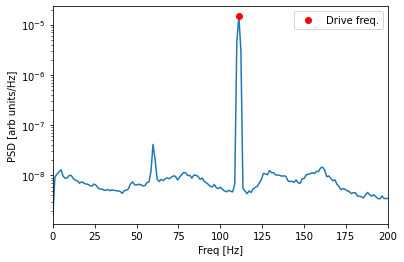

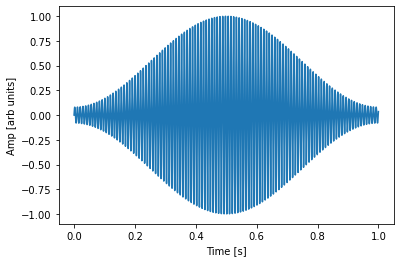

In [5]:
## make a template for the charge measurement
importlib.reload(bu)
dat, attr, _ = bu.get_data(data_list[0])
drive_template, drive_freq = bu.correlation_template_cw(dat, attr, length=1, make_plots=True)

In [222]:
importlib.reload(bu)

charge_vec = []
corr_vec = []
for i,f in enumerate(data_list):

    if(i%10 == 0): print("working on file %d: %s"%(i, f))
    
    cdat, attr, fhandle = bu.get_data(f)
    if(not fhandle):
        continue    

    fname = "corr_%d.png"%i
    #corr_val, curr_corr_vec = bu.simple_correlation_with_drive(cdat, attr, drive_freq, bw=1, decstages=50)
    curr_corr_vec = bu.signed_correlation_with_drive(cdat, attr, nperseg=2**16)
    corr_vec = np.hstack((corr_vec, curr_corr_vec))
    corr_val = np.median(curr_corr_vec)

    time = attr["Time"]

    charge_vec.append([time, corr_val])
charge_vec = np.array(charge_vec)
np.save("charge_steps_%s.npy"%file_label, charge_vec)
np.save("charge_steps_vec_%s.npy"%file_label, corr_vec)

working on file 0: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_0.h5
working on file 10: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_10.h5
working on file 20: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_20.h5
working on file 30: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_30.h5
working on file 40: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_40.h5
working on file 50: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_50.h5
working on file 60: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_60.h5
working on file 70: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_70.h5
working on file 80: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_80.h5
working on file 90: /Volumes/DATA/20230927/meas/1/LPmbar_xyzcool_90.h5
working on file 100: /Volumes/DATA/20230927/meas/2/LPmbar_xyzcool_8.h5
working on file 110: /Volumes/DATA/20230927/meas/2/LPmbar_xyzcool_18.h5
working on file 120: /Volumes/DATA/20230927/meas/2/LPmbar_xyzcool_28.h5
working on file 130: /Volumes/DATA/20230927/meas/2/LPmbar_xyzcool_38.h5
worki

/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/decay_analysis/bead_utils.py:270: RuntimeWarning: divide by zero encountered in true_divide
  corr = -np.real(np.fft.rfft(xdat[st:en])/np.fft.rfft(ddat[st:en])) ## negative sign gives the charge with positve as excess protons
/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/decay_analysis/bead_utils.py:270: RuntimeWarning: invalid value encountered in true_divide
  corr = -np.real(np.fft.rfft(xdat[st:en])/np.fft.rfft(ddat[st:en])) ## negative sign gives the charge with positve as excess protons


working on file 610: /Volumes/DATA/20230927/meas/4/LPmbar_xyzcool_44.h5
working on file 620: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_3.h5
working on file 630: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_13.h5
working on file 640: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_23.h5
working on file 650: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_33.h5
working on file 660: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_43.h5
working on file 670: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_53.h5
working on file 680: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_63.h5
working on file 690: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_73.h5
working on file 700: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_83.h5
working on file 710: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_93.h5
working on file 720: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_103.h5
working on file 730: /Volumes/DATA/20230927/meas/5/LPmbar_xyzcool_113.h5
working on file 740: /Volumes/DATA/20230927/meas/6/LPmbar_xyzco

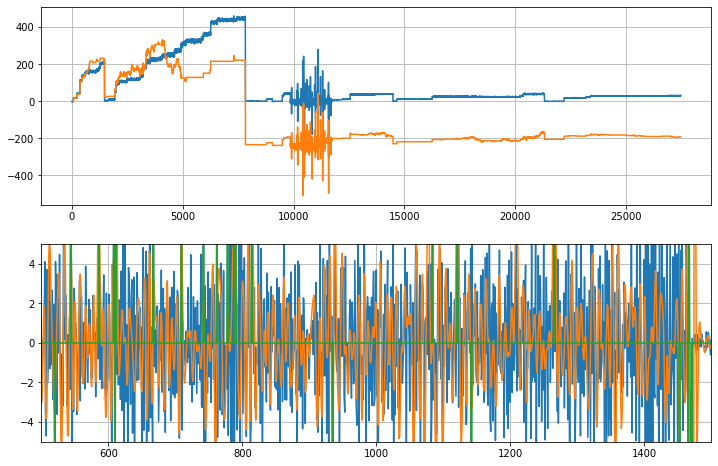

In [357]:
cal_fac = 0.072

xmin, xmax = 500, 1500 #len(corr_vec)
init_charge = -1

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(corr_vec[1:]/cal_fac, '-')
sfac = len(corr_vec)/len(charge_vec[:,1])
xvec = np.arange(len(charge_vec[:,1]))*sfac
#plt.plot(xvec, charge_vec[:,1]/cal_fac, 'o')
#plt.xlim(xmin, xmax)
#plt.ylim(0,200)
plt.grid(True)

plt.subplot(2,1,2)
dv = np.diff(corr_vec/cal_fac)
plt.plot(dv)
b,a = sig.butter(3,0.3)
dv2 = sig.filtfilt(b,a,dv)
dv_chopped = np.round(dv)
bpts = (np.abs(dv) < 2) | (np.abs(dv) < 0.07*corr_vec[:-1]/cal_fac)
dv_chopped[bpts] = 0
plt.plot(dv2*3)
## fix up missed steps
dv_chopped[90] = -1
dv_chopped[226] = 1
dv_chopped[365] = 7
dv_chopped[452] = 25
dv_chopped[586] = 8
dv_chopped[788] = 8
plt.plot(dv_chopped)
plt.xlim(xmin, xmax)
plt.ylim(-5,5)
plt.grid(True)

running_charge = np.cumsum(dv_chopped) + init_charge
plt.subplot(2,1,1)
plt.plot(running_charge, '-')

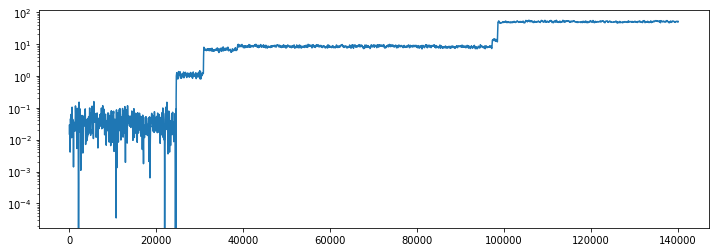

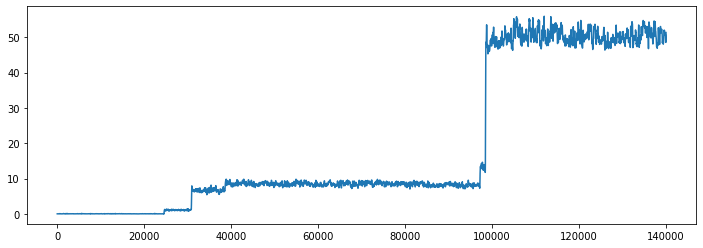

In [145]:
plt.figure(figsize=(12,4))
plt.semilogy(corr_vec)
#plt.ylim(0,12)

plt.figure(figsize=(12,4))
plt.plot(corr_vec)

In [186]:
importlib.reload(bu)
for i in range(10):
    cdat, attr, _ = bu.get_data(data_list[i])
    #corr_val, curr_corr_vec = bu.simple_correlation_with_drive(cdat, attr, drive_freq, bw=1, decstages=20, make_plots=True)
    bu.signed_correlation_with_drive(cdat, attr)